<a href="https://colab.research.google.com/github/TankerRongze/ZeRongNSCI0028_Project/blob/main/BELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BELM

## Data loading

In [308]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
import scipy.io
input_data = scipy.io.loadmat('/content/drive/MyDrive/Project/processed_data.mat')
input_data

{'X': array([[1.235e+03, 8.700e+02, 5.850e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.216e+03, 8.680e+02, 5.900e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.205e+03, 8.710e+02, 5.880e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.203e+03, 8.510e+02, 5.210e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00],
        [1.193e+03, 8.380e+02, 5.310e+02, ..., 4.720e-03, 1.550e-03,
         0.000e+00],
        [1.246e+03, 8.100e+02, 5.440e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00]]), 'Y': array([[400. , 505. ,  35. ],
        [398. , 500. ,  36. ],
        [396. , 497. ,  36.5],
        ...,
        [462. , 571. ,  27.5],
        [464. , 577. ,  29. ],
        [510. , 613. ,  25.5]]), '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Nov 28 16:39:41 2018', '__version__': '1.0'}

In [310]:
import numpy as np

X_unnormalized =  input_data['X']
print(X_unnormalized.shape)

# Converting Y from MATLAB format to NUMPY format and rename it to Y_targets
Y_targets =  input_data['Y'] # Select the target Y and pass it onto the variable called Y_targets

print(Y_targets.shape)

(63162, 27)
(63162, 3)


In [311]:
T = Y_targets[:,0]
T.shape

(63162,)

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt

## Normalizing

In [313]:
# Normal distribution
stdsc = StandardScaler()
X_unnormalized = stdsc.fit_transform(X_unnormalized)

#______________________________________mapminmax_____Normalization
scaler = MinMaxScaler()
scaler.fit(X_unnormalized)
X_normalized = scaler.transform(X_unnormalized)
print(np.amin(X_normalized[:,0]))
print(np.amax(X_normalized))

0.0
1.0000000000000002


## Hold out Cross-Validation

In [314]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, T, test_size=0.2,random_state = 42)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(50529, 27) (50529,) (12633, 27) (12633,)


## Training

In [315]:
 # Creating and training model
model = BayesianRidge(n_iter=1000,tol=1e-5, fit_intercept=True, compute_score=True)#迭代数
model.fit(x_train, y_train)
   
# Model making a prediction on test data
prediction = model.predict(x_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")


r2 Score Of Test Set : 0.8795047162488396


MSE: 1741.96
RMSE: 41.74
MAE: 30.45


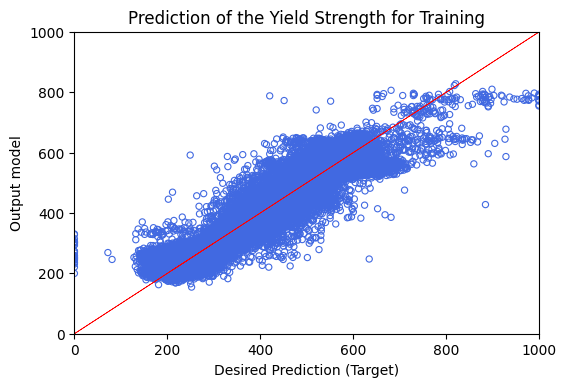

In [316]:
y_pred = model.predict(x_train)
plt.scatter(y_train,y_pred,c='none', marker='o', edgecolors='royalblue',linewidths=0.8,s=20)
#plt.scatter(y_pred, y_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))
print("MAE: %.2f" % mae)
plt.plot(y_train, y_train,'r-',linewidth=0.5)
#plt.plot(y_train, y_train,'g-')
plt.title("Prediction of the Yield Strength for Training")
plt.xlabel("Desired Prediction (Target)")
plt.ylabel("Output model")
plt.rcParams['savefig.dpi'] = 100 #保存图片分辨率
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()

MSE: 1792.14
RMSE: 42.33
MAE: 30.69


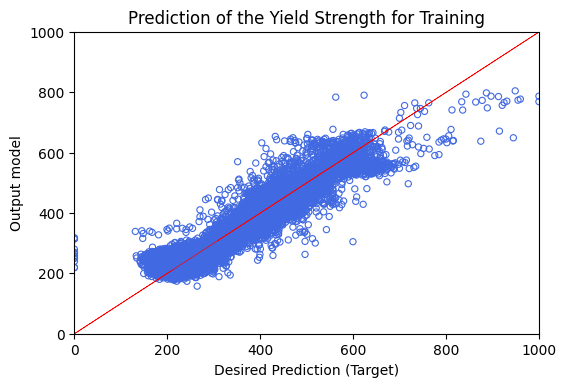

In [317]:
y_pred_test = model.predict(x_test)
plt.scatter( y_test,y_pred_test,c='none', marker='o', edgecolors='royalblue',linewidths=0.8,s=20)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % sqrt(mse))
print("MAE: %.2f" % mae)
plt.plot(y_test, y_test,'r-',linewidth=0.5)
plt.title("Prediction of the Yield Strength for Training")
plt.xlabel("Desired Prediction (Target)")
plt.ylabel("Output model")
plt.rcParams['savefig.dpi'] = 100 #保存图片分辨率
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.show()